# Introduction

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

## The dataset

In [2]:
df = pd.read_csv('train.csv')
df

,Id,Target,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,10000,1500000,2056164.384,11,1.8,0.0,9.0,6.0,1,M,F,V,B,S,J,T,D
1,10001,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,A,F,V,B,S,J,N,1
2,10002,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,A,B,K,B,S,W,D,D
3,10003,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,A,F,K,BG,S,4,T,1
4,10004,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,A,F,K,BG,S,4,T,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14995,2023000,2200000.000,14,2.2,5.0,5.0,5.0,1,M,F,V,D,M,W,D,F
4996,14996,2000000,2265060.241,14,3.0,8.0,2.0,7.0,1,A,F,K,B,S,4,T,1
4997,14997,4040000,4691666.667,11,3.3,3.0,2.0,5.0,2,A,F,K,B,C,J,T,E
4998,14998,1400000,1519047.619,9,1.6,2.0,0.0,7.0,2,M,F,V,BG,S,K,L,1


In [3]:
df.columns

Index(['Id', 'Target', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'C9'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Target  5000 non-null   int64  
 2   N1      5000 non-null   float64
 3   N2      5000 non-null   int64  
 4   N3      5000 non-null   float64
 5   N4      4995 non-null   float64
 6   N5      4995 non-null   float64
 7   N6      4994 non-null   float64
 8   C1      5000 non-null   int64  
 9   C2      5000 non-null   object 
 10  C3      5000 non-null   object 
 11  C4      5000 non-null   object 
 12  C5      5000 non-null   object 
 13  C6      5000 non-null   object 
 14  C7      4999 non-null   object 
 15  C8      4999 non-null   object 
 16  C9      4999 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 664.2+ KB


In [5]:
df.describe()

,Id,Target,N1,N2,N3,N4,N5,N6,C1
count,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,4995.000000,4995.000000,4994.000000,5000.000000
mean,12499.500000,3.268910e+06,3.686798e+06,8.207600,2.298200,4.427027,4.526126,4.434722,1.643200
std,1443.520003,2.002069e+06,2.115422e+06,4.420816,0.717473,2.892762,2.907785,2.907934,0.729383
min,10000.000000,7.000000e+05,6.871795e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,11249.750000,2.142750e+06,2.482731e+06,4.000000,1.600000,2.000000,2.000000,2.000000,1.000000
50%,12499.500000,2.731500e+06,3.157179e+06,9.000000,2.300000,4.000000,5.000000,4.000000,1.000000
75%,13749.250000,3.830250e+06,4.304605e+06,11.000000,2.700000,7.000000,7.000000,7.000000,2.000000
max,14999.000000,2.305900e+07,2.266484e+07,19.000000,5.700000,9.000000,9.000000,9.000000,3.000000


In [6]:
df.isnull().sum()

Id        0
Target    0
N1        0
N2        0
N3        0
N4        5
N5        5
N6        6
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        1
C8        1
C9        1
dtype: int64

In [7]:
df.corr()

,Id,Target,N1,N2,N3,N4,N5,N6,C1
Id,1.000000,0.007299,0.010891,-0.000773,0.010990,0.000217,0.002065,0.005690,0.001013
Target,0.007299,1.000000,0.987358,-0.446597,0.485878,-0.015762,0.015338,0.000749,0.297148
N1,0.010891,0.987358,1.000000,-0.431716,0.505045,-0.012115,0.012149,0.000445,0.258419
N2,-0.000773,-0.446597,-0.431716,1.000000,0.333369,-0.015493,-0.005977,-0.012460,-0.341994
N3,0.010990,0.485878,0.505045,0.333369,1.000000,-0.019395,-0.011079,-0.019984,0.004889
N4,0.000217,-0.015762,-0.012115,-0.015493,-0.019395,1.000000,-0.009480,0.007401,-0.005222
N5,0.002065,0.015338,0.012149,-0.005977,-0.011079,-0.009480,1.000000,0.001478,0.002129
N6,0.005690,0.000749,0.000445,-0.012460,-0.019984,0.007401,0.001478,1.000000,0.017486
C1,0.001013,0.297148,0.258419,-0.341994,0.004889,-0.005222,0.002129,0.017486,1.000000


## EDA and Visualization

<AxesSubplot:xlabel='Target', ylabel='Density'>

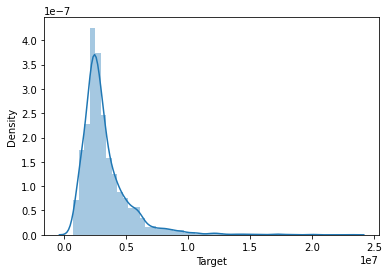

In [8]:
sns.distplot(df['Target'])

array([[<AxesSubplot:title={'center':'N1'}>,
        <AxesSubplot:title={'center':'N2'}>],
       [<AxesSubplot:title={'center':'N3'}>,
        <AxesSubplot:title={'center':'N4'}>],
       [<AxesSubplot:title={'center':'N5'}>,
        <AxesSubplot:title={'center':'N6'}>]], dtype=object)

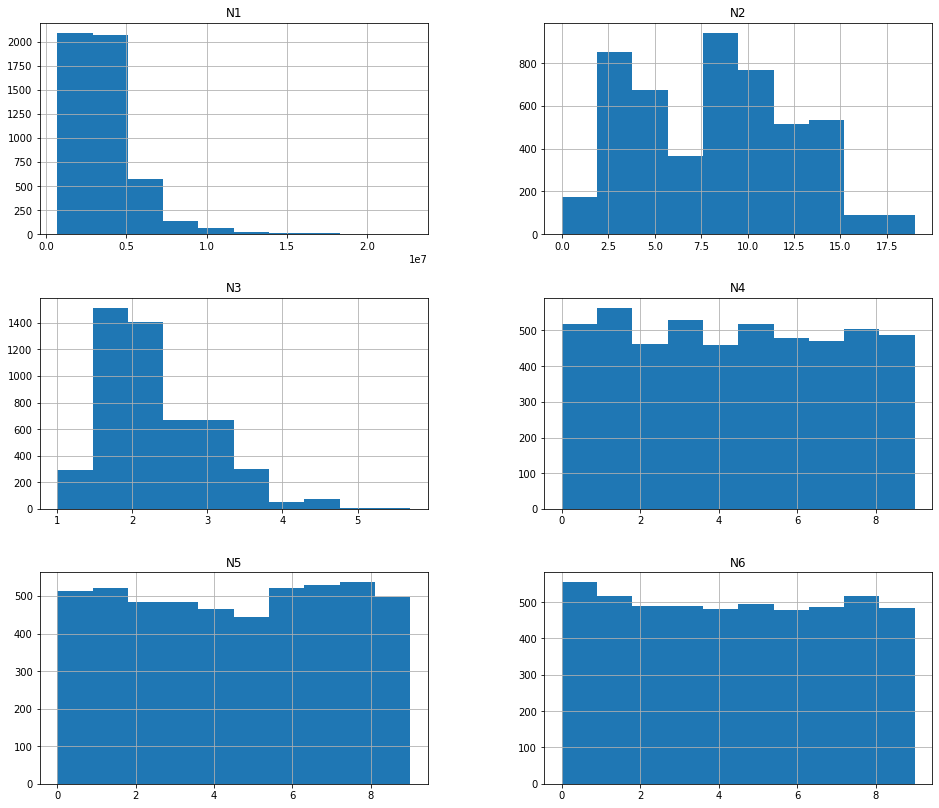

In [9]:
features = []
for i in range (1,7):
    features.append('N'+str(i))
    
df[features].hist(figsize=(16, 14))

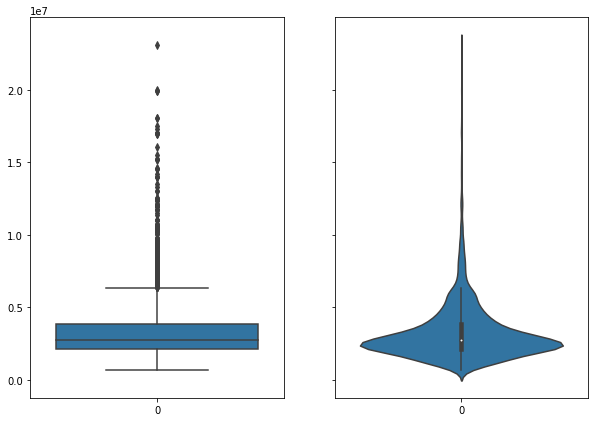

In [10]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 7))
sns.boxplot(data=df["Target"], ax=axes[0])
sns.violinplot(data=df["Target"], ax=axes[1]);

<AxesSubplot:xlabel='C6', ylabel='count'>

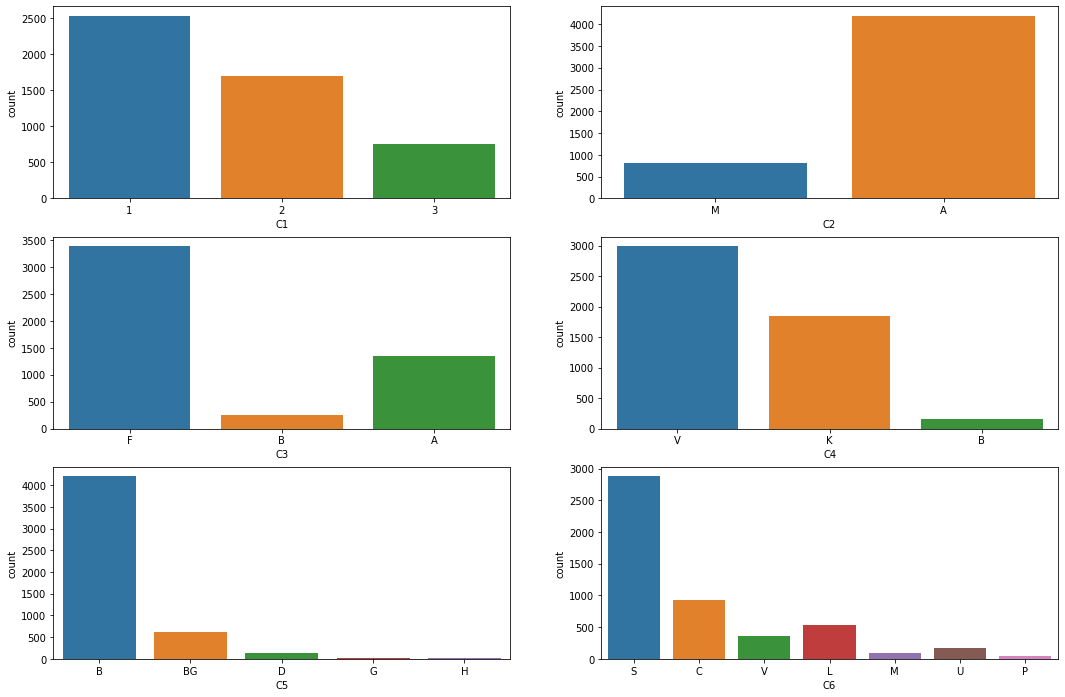

In [11]:
_, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

sns.countplot(x="C1", data=df, ax=axes[0][0])
sns.countplot(x="C2", data=df, ax=axes[0][1])
sns.countplot(x="C3", data=df, ax=axes[1][0])
sns.countplot(x="C4", data=df, ax=axes[1][1])
sns.countplot(x="C5", data=df, ax=axes[2][0])
sns.countplot(x="C6", data=df, ax=axes[2][1])

<AxesSubplot:xlabel='C9', ylabel='count'>

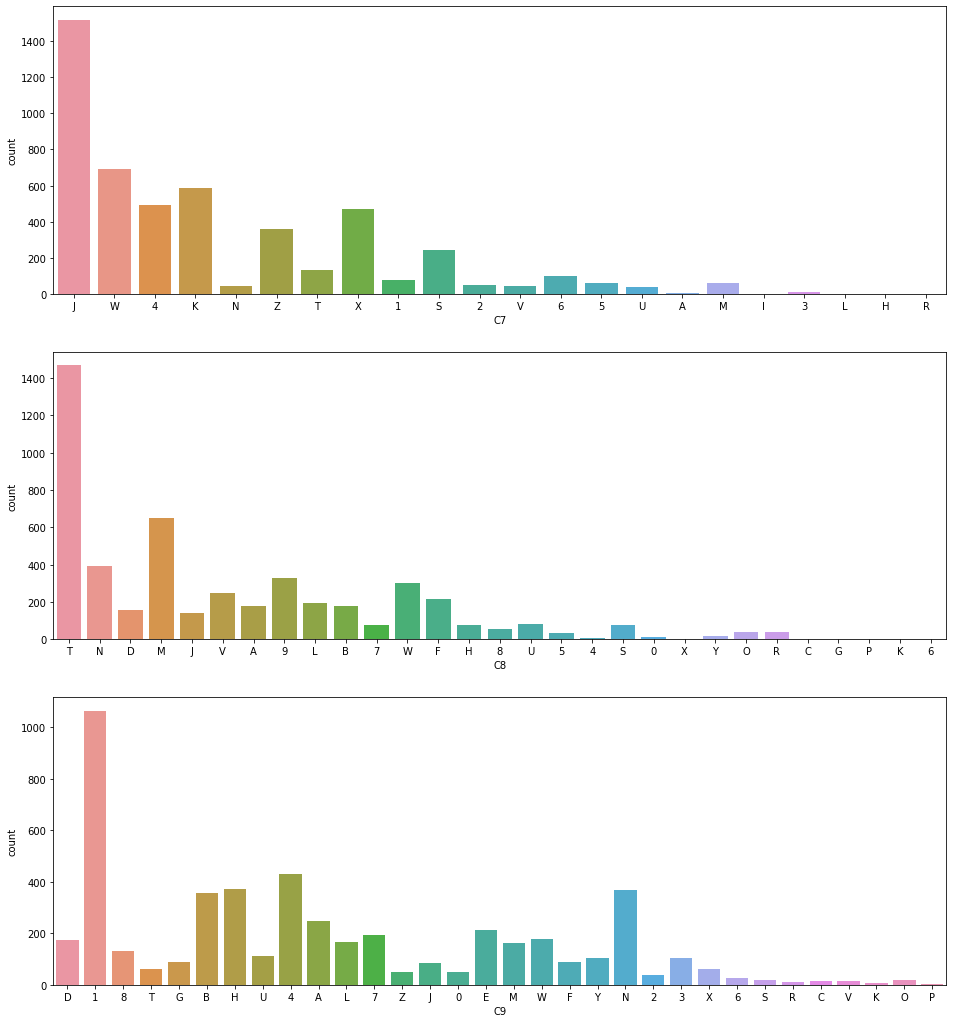

In [12]:
_, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

sns.countplot(x="C7", data=df, ax=axes[0])
sns.countplot(x="C8", data=df, ax=axes[1])
sns.countplot(x="C9", data=df, ax=axes[2])

<AxesSubplot:>

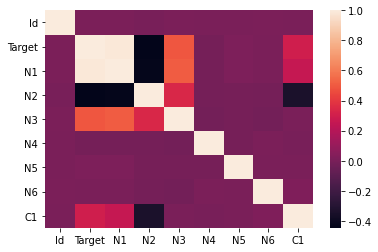

In [13]:
cor = df.corr()
sns.heatmap(cor)

In [14]:
len(df['Id'].unique())

5000

## Importing and merging two datasets

In [15]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df2

,Id,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,20000,2828048.780,8,1.8,6.0,1.0,9.0,1,A,F,V,B,S,W,V,W
1,20001,2866279.070,3,1.6,1.0,2.0,7.0,2,A,F,V,B,L,Z,9,4
2,20002,4620238.095,4,2.0,6.0,6.0,2.0,2,A,A,K,B,C,J,M,B
3,20003,3400000.000,9,2.5,9.0,1.0,9.0,1,A,A,V,B,U,J,F,1
4,20004,3751851.852,9,3.5,8.0,3.0,7.0,1,A,F,K,B,S,J,T,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20995,3586746.988,10,2.4,0.0,2.0,8.0,1,A,F,V,B,C,J,H,L
996,20996,1187209.302,19,1.6,1.0,2.0,4.0,1,A,F,V,B,S,W,V,W
997,20997,3211111.111,9,2.4,2.0,6.0,2.0,3,A,F,V,BG,S,6,T,1
998,20998,3504878.049,10,2.5,5.0,1.0,5.0,1,A,B,V,B,S,X,4,X


Number of unique values for categorical features

In [16]:
cat = []
for i in range (1, 10):
    print(len(df1['C'+str(i)].unique()))
    cat.append('C'+str(i))

3
2
3
3
5
7
23
30
33


In [17]:
for i in range (1, 10):
    print(len(df2['C'+str(i)].unique()))

3
2
3
3
5
7
19
25
31


In [18]:
df2['Target'] = 0
    
df = pd.concat([df1, df2], ignore_index=True)
df

,Id,Target,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,10000,1500000,2056164.384,11,1.8,0.0,9.0,6.0,1,M,F,V,B,S,J,T,D
1,10001,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,A,F,V,B,S,J,N,1
2,10002,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,A,B,K,B,S,W,D,D
3,10003,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,A,F,K,BG,S,4,T,1
4,10004,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,A,F,K,BG,S,4,T,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,20995,0,3586746.988,10,2.4,0.0,2.0,8.0,1,A,F,V,B,C,J,H,L
5996,20996,0,1187209.302,19,1.6,1.0,2.0,4.0,1,A,F,V,B,S,W,V,W
5997,20997,0,3211111.111,9,2.4,2.0,6.0,2.0,3,A,F,V,BG,S,6,T,1
5998,20998,0,3504878.049,10,2.5,5.0,1.0,5.0,1,A,B,V,B,S,X,4,X


Replacing NaN with most common value

In [19]:
df_copy = df.copy()

df_i = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_i.isnull().sum()

Id        0
Target    0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        0
C8        0
C9        0
dtype: int64

Encoding nominal categorical features

In [20]:
cat.remove('C1')
encoder=ce.OneHotEncoder(cols=cat, return_df=True, use_cat_names=True)
df_e = encoder.fit_transform(df_i)

Dropping highly correlated columns

In [21]:
# Create correlation matrix
corr_matrix = df_e.drop(columns='Target').corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print('The highly correlated columns(above 95% of correlation) will be removed:')
print(to_drop)
# Drop features 
df_e.drop(to_drop, axis=1, inplace=True)

The highly correlated columns(above 95% of correlation) will be removed:
['C2_A', 'C8_5', 'C8_K']


In [22]:
df_e

,Id,Target,N1,N2,N3,N4,N5,N6,C1,C2_M,...,C9_3,C9_X,C9_6,C9_S,C9_R,C9_C,C9_V,C9_K,C9_O,C9_P
0,10000,1500000,2056164.384,11,1.8,0.0,9.0,6.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10001,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,10003,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,20995,0,3586746.988,10,2.4,0.0,2.0,8.0,1,0,...,0,0,0,0,0,0,0,0,0,0
5996,20996,0,1187209.302,19,1.6,1.0,2.0,4.0,1,0,...,0,0,0,0,0,0,0,0,0,0
5997,20997,0,3211111.111,9,2.4,2.0,6.0,2.0,3,0,...,0,0,0,0,0,0,0,0,0,0
5998,20998,0,3504878.049,10,2.5,5.0,1.0,5.0,1,0,...,0,1,0,0,0,0,0,0,0,0


Splitting into train and test sets as in the initial datasets 

In [23]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
X_train

,Id,N1,N2,N3,N4,N5,N6,C1,C2_M,C3_F,...,C9_3,C9_X,C9_6,C9_S,C9_R,C9_C,C9_V,C9_K,C9_O,C9_P
0,10000,2056164.384,11,1.8,0.0,9.0,6.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10001,3572619.048,8,2.5,8.0,6.0,9.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10002,9813953.488,6,3.5,2.0,9.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10003,4529545.455,5,2.5,4.0,6.0,4.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10004,3823255.814,10,3.5,1.0,5.0,4.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14995,2200000.000,14,2.2,5.0,5.0,5.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4996,14996,2265060.241,14,3.0,8.0,2.0,7.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4997,14997,4691666.667,11,3.3,3.0,2.0,5.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
4998,14998,1519047.619,9,1.6,2.0,0.0,7.0,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
del X_test['Target']
X_test

,Id,N1,N2,N3,N4,N5,N6,C1,C2_M,C3_F,...,C9_3,C9_X,C9_6,C9_S,C9_R,C9_C,C9_V,C9_K,C9_O,C9_P
5000,20000,2828048.780,8,1.8,6.0,1.0,9.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5001,20001,2866279.070,3,1.6,1.0,2.0,7.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
5002,20002,4620238.095,4,2.0,6.0,6.0,2.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5003,20003,3400000.000,9,2.5,9.0,1.0,9.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5004,20004,3751851.852,9,3.5,8.0,3.0,7.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,20995,3586746.988,10,2.4,0.0,2.0,8.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5996,20996,1187209.302,19,1.6,1.0,2.0,4.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5997,20997,3211111.111,9,2.4,2.0,6.0,2.0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
5998,20998,3504878.049,10,2.5,5.0,1.0,5.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


Using pipeline with components

In [25]:
# Principle components regression
steps = [
    ('scale', MinMaxScaler()),
    ('pca', PCA(0.9449)),
    ('estimator', LinearRegression())
]
pipe = Pipeline(steps)

del X_train['Id']
pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

846349911391.2006


In [26]:
steps = [
    ('scale', StandardScaler()),
    ('pca', PCA(0.9449)),
    ('estimator', LinearRegression())
]
pipe = Pipeline(steps)

pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

437700371654.1737


In [27]:
#1178081656656.396
#1432556847776.788
#846159518192.0176

In [28]:
mms = MinMaxScaler()
mms.fit(X_train)
data = mms.transform(X_train)

pca = PCA(0.9449)
r_df = pca.fit_transform(data)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([14.54, 23.53, 30.7 , 35.36, 39.89, 44.2 , 48.32, 51.85, 55.02,
       57.75, 60.39, 62.73, 64.91, 67.02, 69.05, 71.05, 73.01, 74.85,
       76.59, 78.13, 79.37, 80.5 , 81.57, 82.52, 83.46, 84.36, 85.25,
       86.09, 86.85, 87.6 , 88.29, 88.93, 89.55, 90.15, 90.69, 91.21,
       91.71, 92.2 , 92.64, 93.07, 93.5 , 93.9 , 94.28, 94.64])

In [29]:
r_df.shape

(5000, 44)

In [30]:
idl = X_test['Id']

del X_test['Id']

y_pred_test = pipe.predict(X_test)
#metrics.mean_squared_error()

In [31]:
dict = {'Id': idl, 'Target': y_pred_test} 
results = pd.DataFrame(dict, index=None)
results

,Id,Target
5000,20000,2.556387e+06
5001,20001,2.556777e+06
5002,20002,4.340516e+06
5003,20003,3.121956e+06
5004,20004,3.589450e+06
...,...,...
5995,20995,4.489603e+05
5996,20996,2.826993e+05
5997,20997,3.079244e+06
5998,20998,3.439843e+06


In [32]:
results.to_csv('predicted.csv', index=False)

## Droping nans

In [33]:
df = df_copy
df_c = df.dropna()
df_c.isnull().sum()

Id        0
Target    0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        0
C8        0
C9        0
dtype: int64

In [34]:
encoder=ce.OneHotEncoder(cols=cat, return_df=True, use_cat_names=True)
dfe = encoder.fit_transform(df_c)

In [35]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']

# Principle components regression
steps = [
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('estimator', LinearRegression())
]
#LinearRegression
#Lasso
#Ridge
pipe = Pipeline(steps)

pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

85322287990.42058


In [36]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']

# Principle components regression
steps = [
    ('scale', MinMaxScaler()),
    ('pca', PCA(0.9449)),
    ('estimator', LinearRegression())
]
#LinearRegression
#Lasso
#Ridge
pipe = Pipeline(steps)

pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

846349911391.2006


In [37]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']
del X_test['Id']

lr = LinearRegression()
#lr = Lasso()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

85321466542.69157


In [38]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']
del X_test['Id']

mms = StandardScaler()
mms.fit(X_train)
data = mms.transform(X_train)

lr = LinearRegression()
#lr = Lasso()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

85321466542.69157


In [39]:
import statsmodels.api as sm

train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']
del X_test['Id']

X_train = sm.add_constant(X_train)

#lr = LinearRegression()
#lr = Lasso()
model = sm.OLS(y_train, X_train)
res = model.fit()
#lr.fit(X_train, y_train)
#y_pred_train = lr.predict(X_train)
#print(metrics.mean_squared_error(y_train, y_pred_train))
y_pred_train = res.fittedvalues
print(metrics.mean_squared_error(y_train, y_pred_train))

85321466542.6916


In [40]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']
del X_test['Id']

sc = [StandardScaler(), MinMaxScaler()]
md = [LinearRegression(), Ridge(), Lasso()]
ml = []
sl = []
msel = []
pcal = []

for m in md:
    m.fit(X_train, y_train)
    y_pred_train = m.predict(X_train)
    ml.append(str(m))
    sl.append('none')
    msel.append(metrics.mean_squared_error(y_train, y_pred_train))
    pcal.append('no')
    for s in sc:
        steps = [
            ('scale', s),
            ('pca', PCA()),
            ('estimator', m)
        ]
        pipe = Pipeline(steps)
        pipe.fit(X_train, y_train)
        y_pred_train = pipe.predict(X_train)
        
        ml.append(str(m))
        sl.append(str(s))
        msel.append(metrics.mean_squared_error(y_train, y_pred_train))
        pcal.append('yes')
        
    
for s in sc:
    for m in md:
        x = s.fit_transform(X_train)
        m.fit(x, y_train)
        y_pred_train = m.predict(x)
        ml.append(str(m))
        sl.append(str(s))
        msel.append(metrics.mean_squared_error(y_train, y_pred_train))
        pcal.append('no')

In [41]:
"""846349911391.2006
846349911391.2006
846349911391.2006
846349912302.285
85321466542.69157
85385193580.69093
85321576226.02592
85322287990.42058
85321467088.6142
85322265565.75931
85321466542.6916
85322287990.42058"""

'846349911391.2006\n846349911391.2006\n846349911391.2006\n846349912302.285\n85321466542.69157\n85385193580.69093\n85321576226.02592\n85322287990.42058\n85321467088.6142\n85322265565.75931\n85321466542.6916\n85322287990.42058'

In [42]:
dict = {'model': ml, 'scaler': sl, 'mse': msel, 'pca': pcal} 
results = pd.DataFrame(dict, index=None)
results

,model,scaler,mse,pca
0,LinearRegression(),none,8.532147e+10,no
1,LinearRegression(),StandardScaler(),8.532229e+10,yes
2,LinearRegression(),MinMaxScaler(),8.532156e+10,yes
3,Ridge(),none,8.538519e+10,no
4,Ridge(),StandardScaler(),8.532227e+10,yes
5,Ridge(),MinMaxScaler(),9.250057e+10,yes
6,Lasso(),none,8.532158e+10,no
7,Lasso(),StandardScaler(),8.532147e+10,yes
8,Lasso(),MinMaxScaler(),8.532153e+10,yes
9,LinearRegression(),StandardScaler(),8.532147e+10,no


In [43]:
y_pred_test = lr.predict(X_test)
#metrics.mean_squared_error()
dict = {'Id': idl, 'Target': y_pred_test} 
results = pd.DataFrame(dict, index=None)
results
results.to_csv('predicted.csv', index=False)

In [44]:
df = df_copy

df_c_i = df[['C7', 'C8', 'C9']].apply(lambda x: x.fillna(x.value_counts().index[0]))
df_n_i = df.iloc[:, :8].apply(lambda x: x.fillna(x.mean()))
df_n_i[['C1', 'C2', 'C3', 'C4', 'C5', 'C6']] = df_copy[['C1', 'C2', 'C3', 'C4', 'C5', 'C6']]
df_n_i[['C7', 'C8', 'C9']] = df_c_i 
df_i = df_n_i
df_i.isnull().sum()

Id        0
Target    0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        0
C8        0
C9        0
dtype: int64

In [45]:
encoder=ce.OneHotEncoder(cols=cat, return_df=True, use_cat_names=True)
df_e = encoder.fit_transform(df_i)
# Create correlation matrix
corr_matrix = df_e.drop(columns='Target').corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print('The highly correlated columns(above 95% of correlation) will be removed:')
print(to_drop)
# Drop features 
df_e.drop(to_drop, axis=1, inplace=True)

The highly correlated columns(above 95% of correlation) will be removed:
['C2_A', 'C8_5', 'C8_K']


In [46]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']
del X_test['Id']

sc = [StandardScaler(), MinMaxScaler()]
md = [LinearRegression(), Ridge(), Lasso()]
ml = []
sl = []
msel = []
pcal = []

for m in md:
    m.fit(X_train, y_train)
    y_pred_train = m.predict(X_train)
    ml.append(str(m))
    sl.append('none')
    msel.append(metrics.mean_squared_error(y_train, y_pred_train))
    pcal.append('no')
    for s in sc:
        steps = [
            ('scale', s),
            ('pca', PCA()),
            ('estimator', m)
        ]
        pipe = Pipeline(steps)
        pipe.fit(X_train, y_train)
        y_pred_train = pipe.predict(X_train)
        
        ml.append(str(m))
        sl.append(str(s))
        msel.append(metrics.mean_squared_error(y_train, y_pred_train))
        pcal.append('yes')
        
    
for s in sc:
    for m in md:
        x = s.fit_transform(X_train)
        m.fit(x, y_train)
        y_pred_train = m.predict(x)
        ml.append(str(m))
        sl.append(str(s))
        msel.append(metrics.mean_squared_error(y_train, y_pred_train))
        pcal.append('no')

In [47]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']

# Principle components regression
steps = [
    ('scale', MinMaxScaler()),
    ('pca', PCA(0.9449)),
    ('estimator', LinearRegression())
]
#LinearRegression
#Lasso
#Ridge
pipe = Pipeline(steps)

pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

846197099112.8185


In [48]:
train = df_e[:5000]
test = df_e[5000:]
X_train = train.drop(columns='Target')
y_train = train['Target']
X_test = test
del X_train['Id']
del X_test['Target']

# Principle components regression
steps = [
    ('scale', StandardScaler()),
    ('pca', PCA(0.9449)),
    ('estimator', LinearRegression())
]
#LinearRegression
#Lasso
#Ridge
pipe = Pipeline(steps)

pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

437740675889.0715


In [51]:
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

85321254339.6871


In [ ]:
#('scale', MinMaxScaler()),
#('pca', PCA(0.9449)),
#('estimator', LinearRegression())
#846349911391.2006

In [ ]:
#437740675889.0715
#846197099112.8185
#85321466542.69157
#85321466542.6916
#846349911391.2006

In [49]:
dict = {'model': ml, 'scaler': sl, 'mse': msel, 'pca': pcal} 
results = pd.DataFrame(dict, index=None)
results

,model,scaler,mse,pca
0,LinearRegression(),none,8.532125e+10,no
1,LinearRegression(),StandardScaler(),8.532150e+10,yes
2,LinearRegression(),MinMaxScaler(),8.532617e+10,yes
3,Ridge(),none,8.538495e+10,no
4,Ridge(),StandardScaler(),8.532205e+10,yes
5,Ridge(),MinMaxScaler(),9.250028e+10,yes
6,Lasso(),none,8.532136e+10,no
7,Lasso(),StandardScaler(),8.532125e+10,yes
8,Lasso(),MinMaxScaler(),8.532132e+10,yes
9,LinearRegression(),StandardScaler(),8.532133e+10,no


In [52]:
#1178081656656.396
#1432556847776.788
#846159518192.0176
#846349911391.2006


## Conclusion
■ We have seen cleaning, shaping, EDA, preprocessing and PCA on our data. 
Then we trained and tested our data on different models with different scalings:
    
    ■ -Linear Regression
    ■ -Ridge
    ■ -Lasso

■ And we have the best performance with Linear Regression.
